
<br><br>

### Considere o dataset abaixo:

Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


In [7]:
def SampleaTreinoTeste(df, percentil):
    linhas = df.shape[0]

    treino = df[:int(linhas*(1-percentil))]
    teste = df[int(linhas*(1-percentil)):]

    print(treino.shape, teste.shape)
    return treino, teste

ds_treino, ds_teste = SampleaTreinoTeste(df, 0.25) #os ds's retornados pela funcao serao atribuidos a ds_treino e ds_teste, sendo que um tera 75% das linhas do df original e o outro o restante (25%)

(1845, 5) (615, 5)


In [4]:
# Vamos analisar as correlações entre variáveis.

ds_treino.corr().round(2)

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
ind_pop_cid,1.00,0.01,-0.06,-0.02,0.08
perc_pol,0.01,1.00,0.40,-0.06,-0.38
taxa_crim,-0.06,0.40,1.00,0.08,0.58
nivel_ed,-0.02,-0.06,0.08,1.00,-0.21
crimes,0.08,-0.38,0.58,-0.21,1.00


In [ ]:
"""
NEG
QTD_CRIME X PERCENTUAL_POlICIAIS
NIVEL_EDUCACIONAL X CRIMES

POS
TAXA_CRIMINALIDADE X PERC_POLICIAIS
QTD_CRIMES X TAXA_CRIMINALIDADE

TARGET = QTD_CRIMES 
"""

In [ ]:
#
#  Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

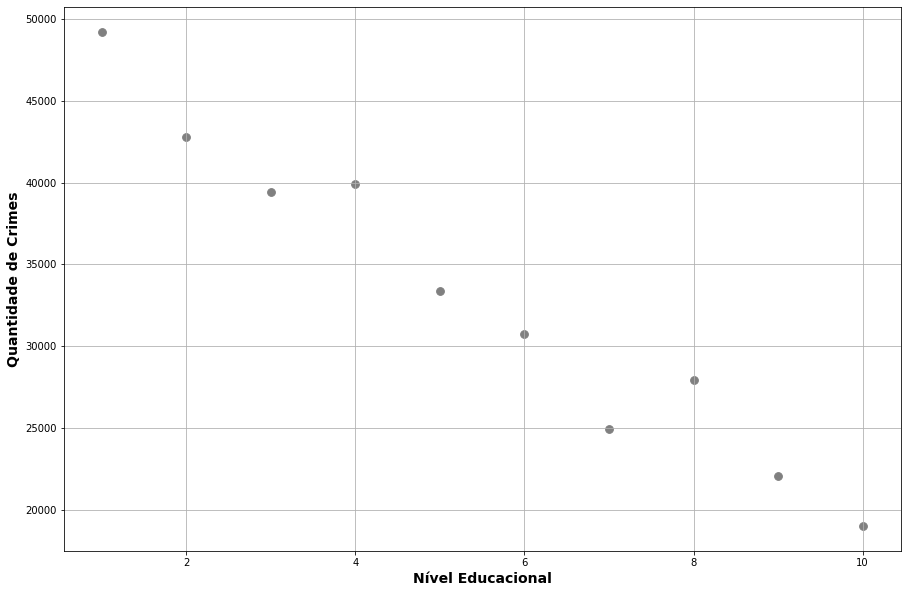

In [5]:
import matplotlib.pyplot as plt

dss = ds_treino.groupby(['nivel_ed'], as_index=False).crimes.sum()

plt.figure(figsize=[15,10])
plt.scatter(dss.nivel_ed, dss.crimes, s = 60, c = 'gray')
plt.xlabel("Nível Educacional", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de Crimes", fontweight = 'bold', fontsize = 14)

plt.grid()
plt.show()

<ipython-input-8-bfd2948eac75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtc.taxa_crim[i] = int(dtc.taxa_crim[i])


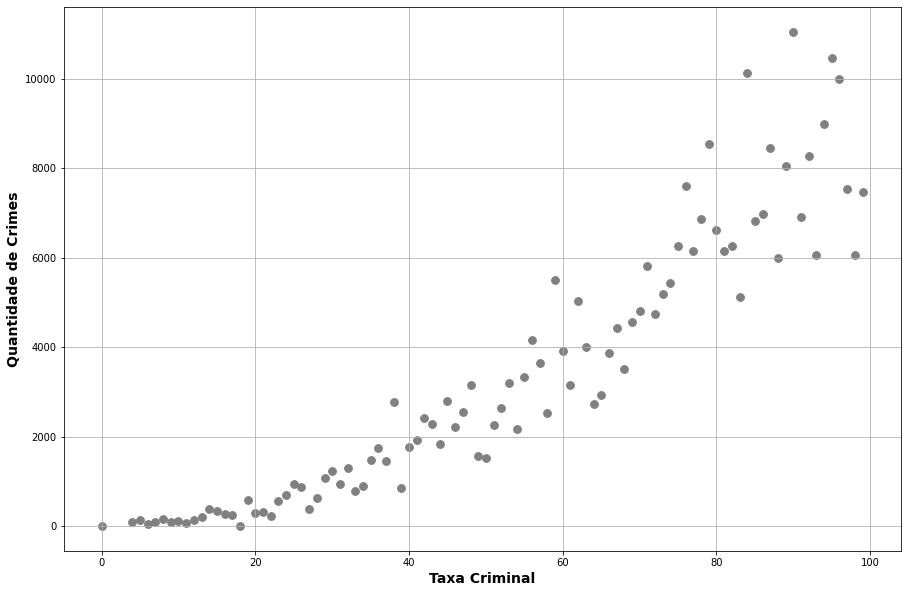

In [8]:
dtc = ds_treino.groupby(['taxa_crim'], as_index=False).crimes.sum()

for i in range(len(dtc.taxa_crim)):
    dtc.taxa_crim[i] = int(dtc.taxa_crim[i])

dtc = dtc.groupby(['taxa_crim'], as_index=False).crimes.sum()

plt.figure(figsize=[15,10])
plt.scatter(dtc['taxa_crim'], dtc['crimes'], s = 60, c = 'gray')
plt.xlabel("Taxa Criminal", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de Crimes", fontweight = 'bold', fontsize = 14)
plt.grid()
plt.show()

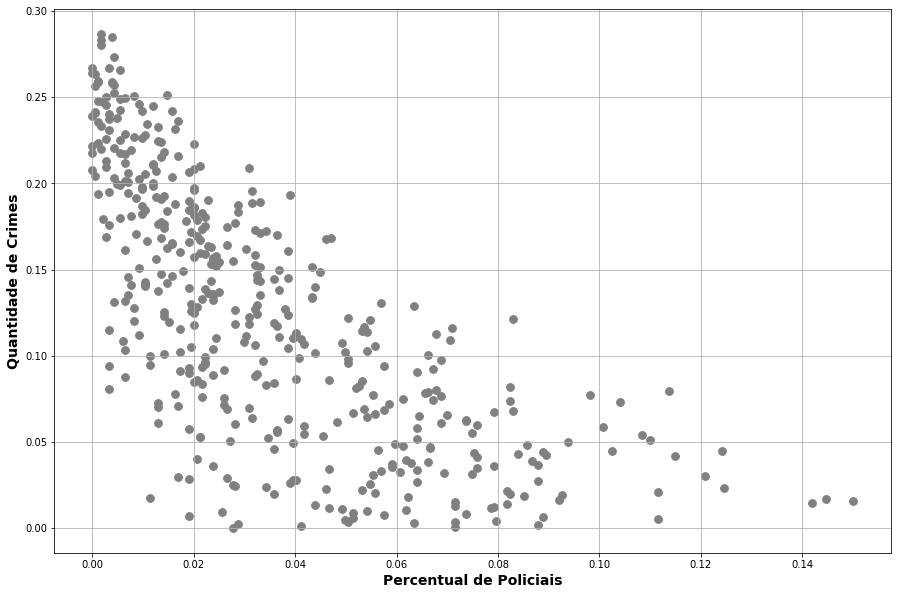

In [257]:
dff = ds_treino.groupby(['crimes'], as_index=False).sum() / ds_treino.shape[0] 
plt.figure(figsize=[15,10])
plt.scatter(dff['perc_pol'], dff['crimes'], s = 60, c = 'gray')
plt.xlabel("Percentual de Policiais", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de Crimes", fontweight = 'bold', fontsize = 14)
plt.grid()
plt.show()

In [258]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

x = dff.perc_pol
y = dff.crimes

def reshape(x, y):
    x = x.values.reshape(-1,1)
    y = y.values.reshape(-1,1)
    return x, y

x, y = reshape(x, y)
lm.fit(x, y)

ypred = lm.predict(x)

In [259]:

lm.intercept_, lm.coef_

(array([0.18772138]), array([[-1.83884683]]))

In [260]:
import numpy as np

def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [261]:
RMSE(y = y, y_pred = ypred)

0.05235385338822392

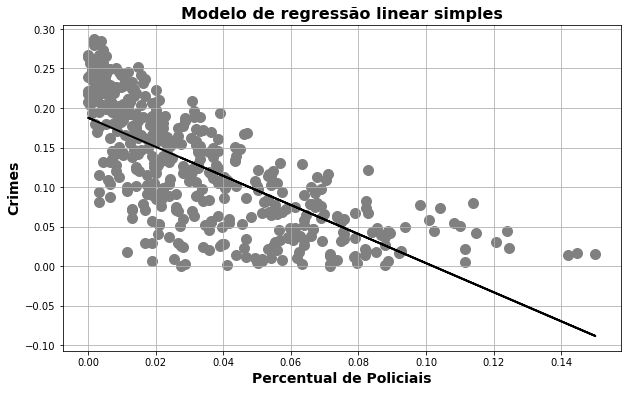

In [263]:
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight = 'bold', fontsize = 16)
plt.scatter(dff['perc_pol'], dff['crimes'], s = 100, c = 'gray')
plt.xlabel("Percentual de Policiais", fontweight = 'bold', fontsize = 14)
plt.ylabel("Crimes", fontweight = 'bold', fontsize = 14)


plt.plot(x, ypred, c = 'black', lw = 2)
plt.grid()

In [264]:
lm.intercept_, lm.coef_

(array([0.18772138]), array([[-1.83884683]]))

In [270]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

X = dff[['perc_pol']].values
y = dff.crimes.values

knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

<ipython-input-273-4acc0704e8a9>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,5,i/10)
<ipython-input-273-4acc0704e8a9>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,5,i/10)
<ipython-input-273-4acc0704e8a9>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,5,i/10)
<ipython-input-273-4acc0704e8a9>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,5,i/10)
<ipython-input-273-4acc0704e8a9>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position spe

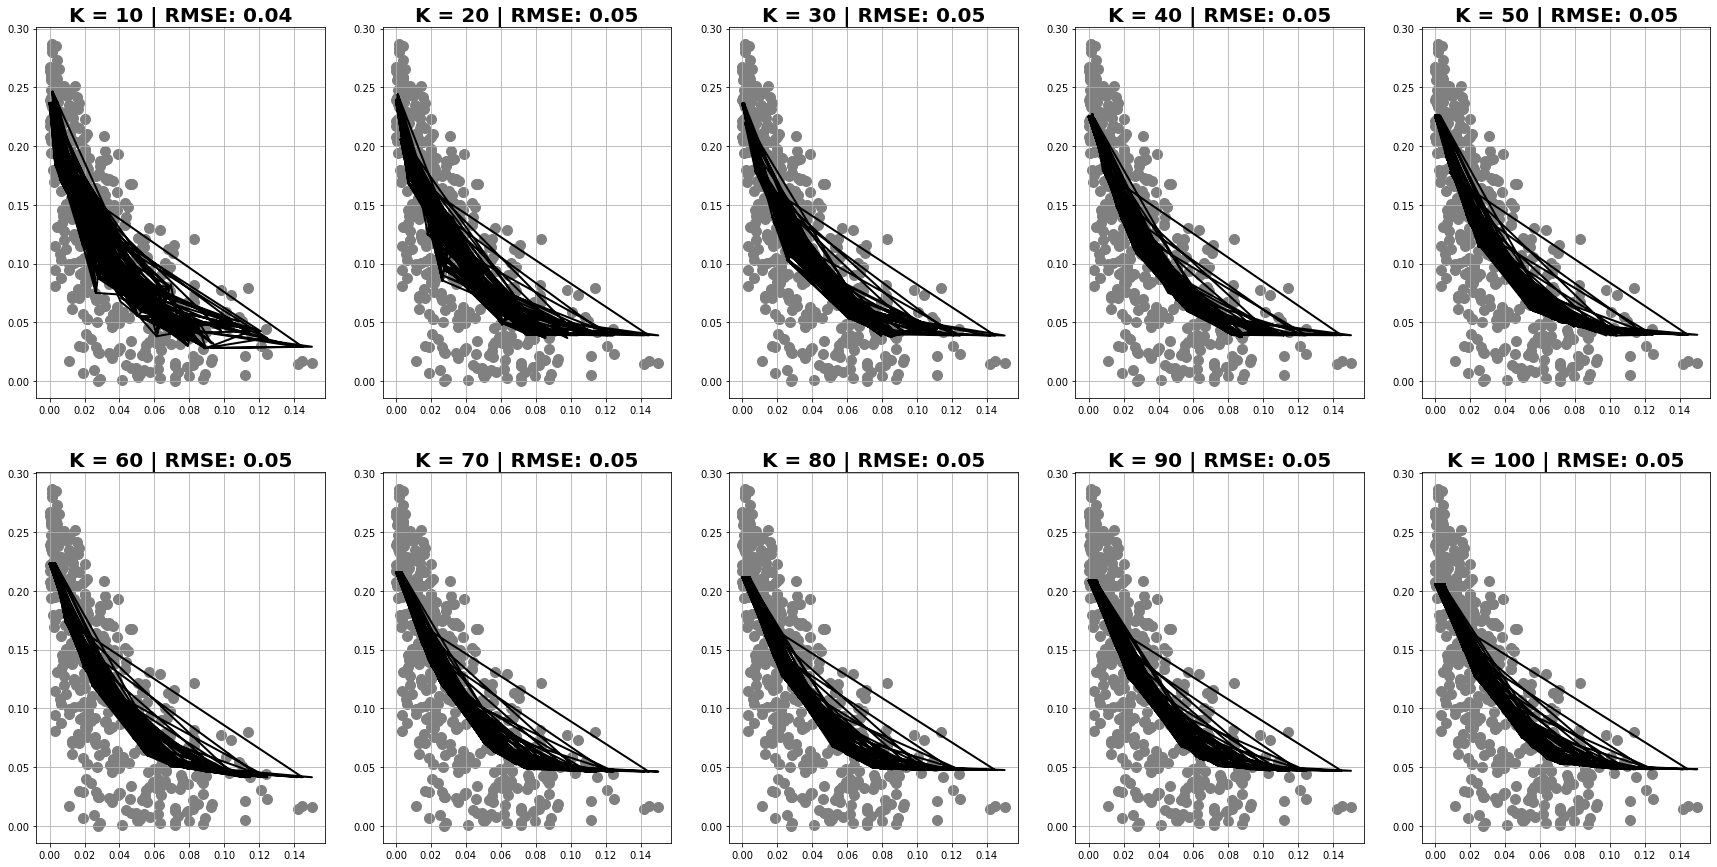

In [273]:
plt.figure(figsize=[30,15])

for i in range(10, 110, 10):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i/10)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(dff['perc_pol'], dff['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

In [275]:
plt.figure(figsize=[30,15])

for i in range(10, 440, 40):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)

    if i/ 40 < 1:
        i = 1
    else: 
        i = i /40
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i*40)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(dff['perc_pol'], dff['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

<ipython-input-275-a3065343bf46>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,5,i)
<ipython-input-275-a3065343bf46>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,5,i)
<ipython-input-275-a3065343bf46>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,5,i)
<ipython-input-275-a3065343bf46>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,5,i)
<ipython-input-275-a3065343bf46>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specificat

In [254]:
dff_teste = ds_teste.groupby(['crimes'], as_index=False).sum() / dff_teste.shape[0]
dff_teste

,crimes,ind_pop_cid,perc_pol,taxa_crim,nivel_ed
0,0.003106,0.018634,0.122128,0.215825,0.034161
1,0.006211,0.018634,0.182665,0.350045,0.027950
2,0.015528,0.015528,0.226352,0.509524,0.040373
3,0.018634,0.024845,0.179057,0.382171,0.034161
4,0.021739,0.031056,0.050481,0.059230,0.037267
...,...,...,...,...,...
317,1.500000,0.006211,0.018498,0.302720,0.003106
318,1.503106,0.009317,0.011167,0.285804,0.003106
319,1.527950,0.006211,0.005748,0.286222,0.003106
320,1.534161,0.015528,0.011518,0.256192,0.003106


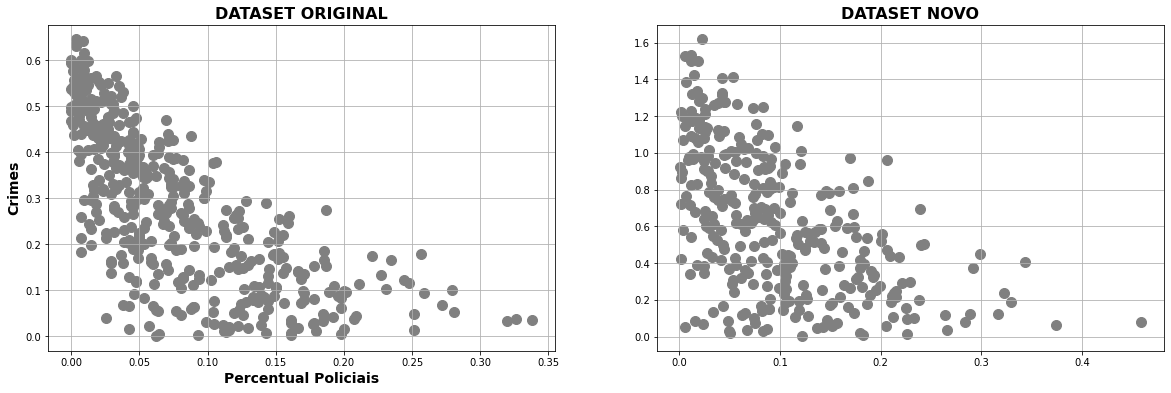

In [255]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("DATASET ORIGINAL", fontsize = 16, fontweight = 'bold')
plt.scatter(dff['perc_pol']/dff.shape[0], dff['crimes']/dff.shape[0], s = 100, c = 'gray')
plt.grid()
plt.xlabel("Percentual Policiais", fontsize = 14, fontweight = 'bold')
plt.ylabel("Crimes", fontsize = 14, fontweight = 'bold')
plt.subplot(1,2,2)
plt.title("DATASET NOVO", fontsize = 16, fontweight = 'bold')
plt.scatter(dff_teste['perc_pol'], dff_teste['crimes'], s = 100, c = 'gray')
plt.grid()
plt.show()

In [157]:
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 100)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'gray', s = 100)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

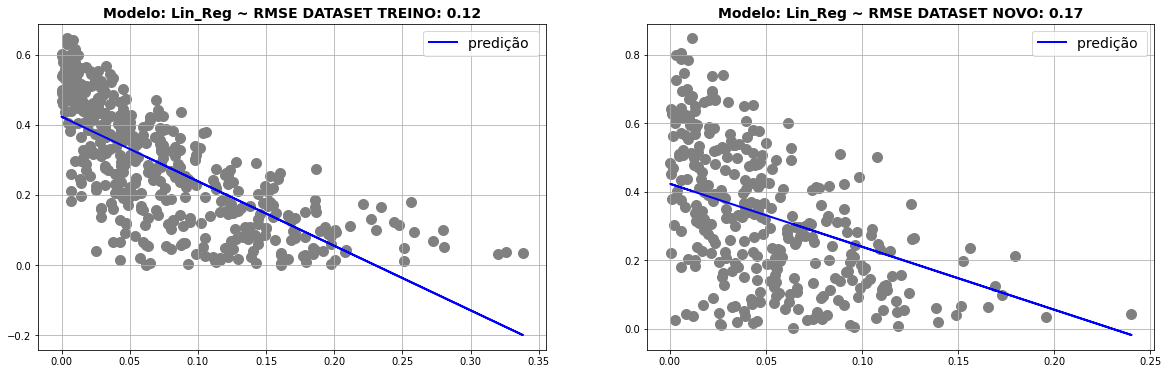

In [196]:
X = dff['perc_pol'].values.reshape(-1,1) / dff.shape[0]
y = dff['crimes'].values / dff.shape[0]

Xnovo = dff_teste['perc_pol'].values.reshape(-1,1)
ynovo = dff_teste['crimes'].values 

modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

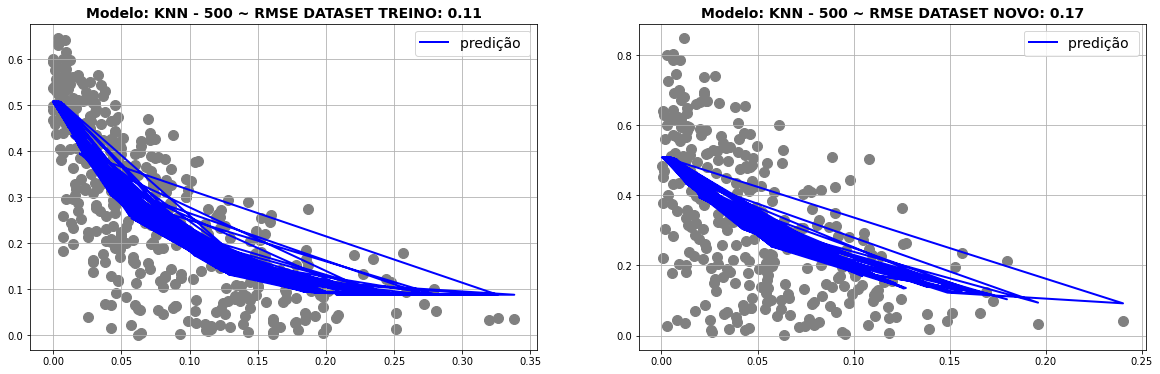

In [215]:
modelo = KNeighborsRegressor(n_neighbors = 44)
nome_modelo = 'KNN - 500'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

## SAIBA O PERCENTUAL DE CRIMES COM BASE NO PERCENTUAL DE POLICIAIS:

Parte 2:
1: Escolhida a variável percentual de policiais por ter uma boa correlação com a variável quantidade de crimes 
O modelo de regressão linear simples está sofrendo de underfiting, enquanto o modelo KNN está sofrendo de overfiting.

In [204]:
user_input = float(input('Insira o percentual de policiais que deseja calcular a taxa de crimes: ')) /100
predicao = modelo.predict(np.array([[user_input]]))
print((predicao[0]*100).round(), "%")


24.0 %


## Escolhendo outra variável

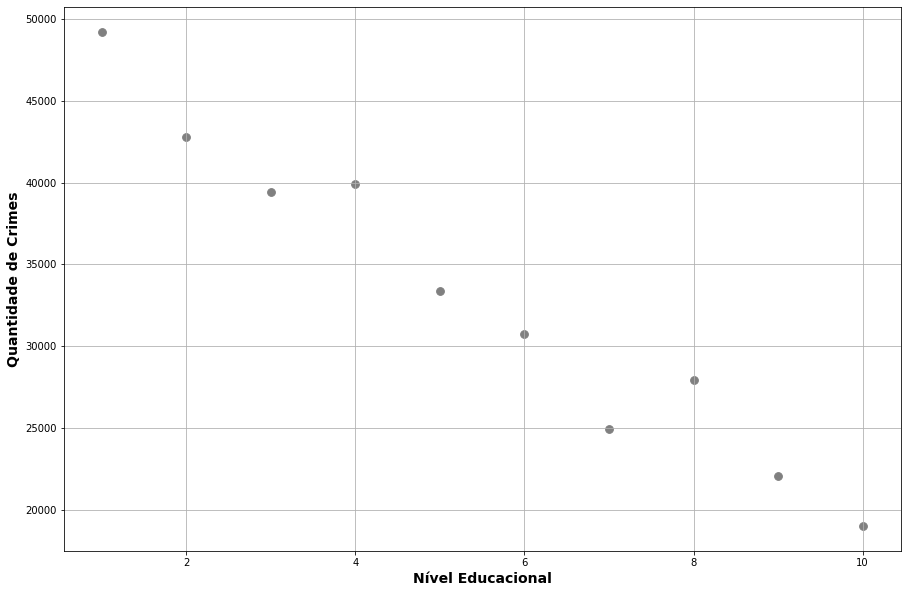

In [14]:
dss = ds_treino.groupby(['nivel_ed'], as_index=False).crimes.sum()

plt.figure(figsize=[15,10])
plt.scatter(dss.nivel_ed, dss.crimes, s = 60, c = 'gray')
plt.xlabel("Nível Educacional", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de Crimes", fontweight = 'bold', fontsize = 14)

plt.grid()
plt.show()

In [16]:
X = dss[['nivel_ed']].values
y = dss.crimes.values

knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X, y)

plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(dss['nivel_ed'], dss['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

NameError: name 'KNeighborsRegressor' is not defined

In [26]:
dss_teste = ds_teste.groupby(['nivel_ed'], as_index=False).crimes.sum()

for i in range(len(dss_teste.nivel_ed)):
    dss_teste.nivel_ed[i] = int(dss_teste.nivel_ed[i])

dss_teste = dss_teste.groupby(['nivel_ed'], as_index=False).crimes.sum()

<ipython-input-26-6f36a1ac2959>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dss_teste.nivel_ed[i] = int(dss_teste.nivel_ed[i])


NameError: name 'dss_teste' is not defined

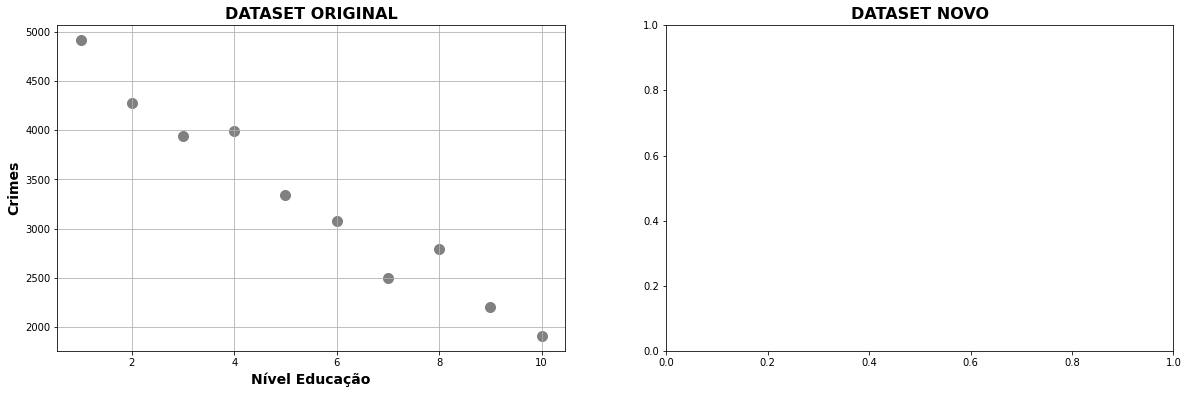

In [15]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("DATASET ORIGINAL", fontsize = 16, fontweight = 'bold')
plt.scatter(dss['nivel_ed'], dss['crimes'], s = 100, c = 'gray')
plt.grid()
plt.xlabel("Nível Educação", fontsize = 14, fontweight = 'bold')
plt.ylabel("Crimes", fontsize = 14, fontweight = 'bold')
plt.subplot(1,2,2)
plt.title("DATASET NOVO", fontsize = 16, fontweight = 'bold')
plt.scatter(dss_teste['nivel_ed'],dss_teste['crimes'], s = 100, c = 'gray')
plt.grid()
plt.show()

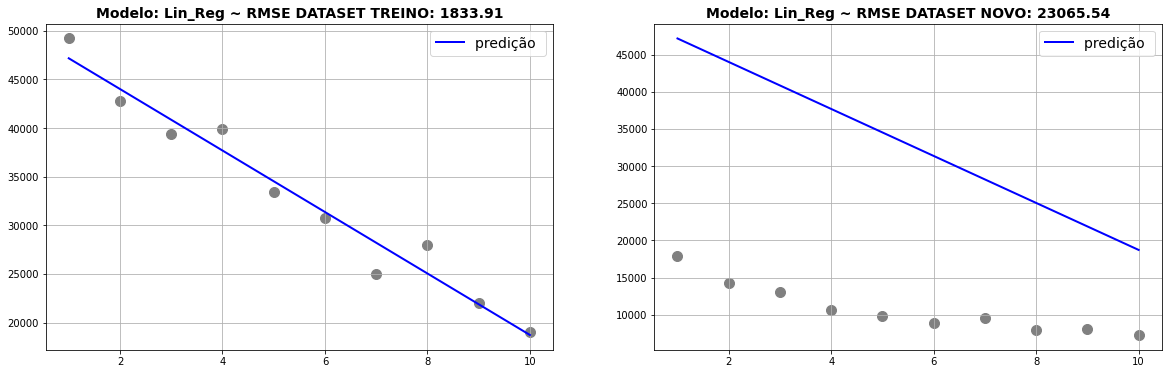

In [28]:
X = dss['nivel_ed'].values.reshape(-1,1)
y = dss['crimes'].values
Xnovo = dss_teste['nivel_ed'].values.reshape(-1,1)
ynovo = dss_teste['crimes'].values

modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

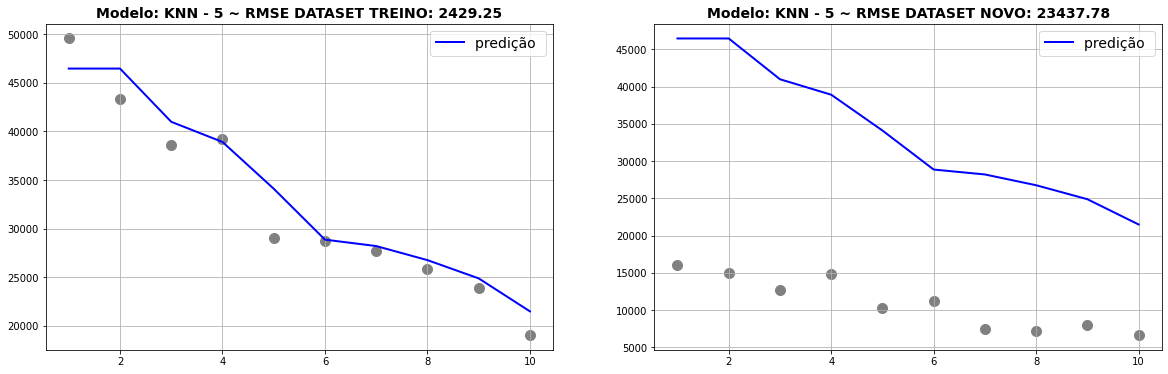

In [229]:
modelo = KNeighborsRegressor(n_neighbors = 2)
nome_modelo = 'KNN - 5'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

<ipython-input-29-f112f274cbf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtc.taxa_crim[i] = int(dtc.taxa_crim[i])


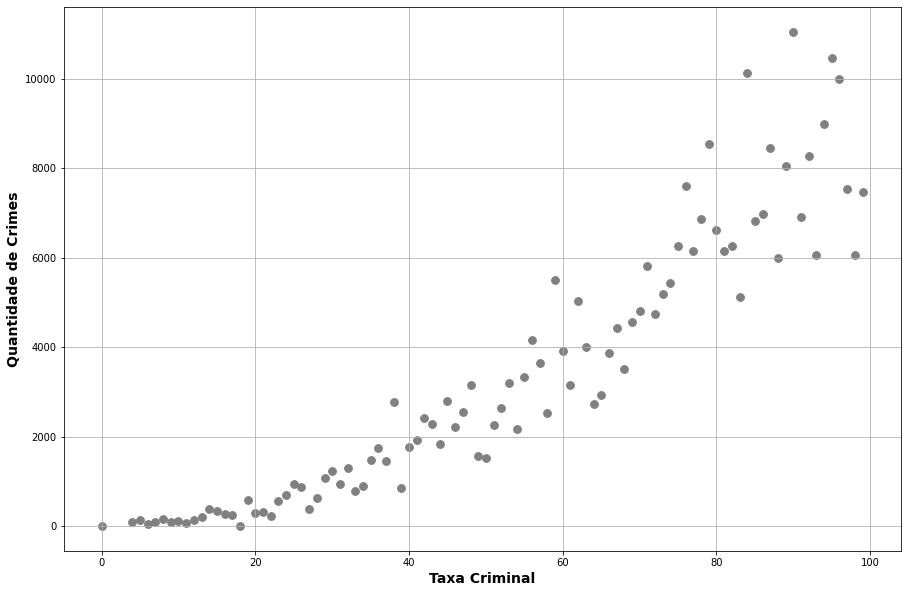

In [29]:
dtc = ds_treino.groupby(['taxa_crim'], as_index=False).crimes.sum()

for i in range(len(dtc.taxa_crim)):
    dtc.taxa_crim[i] = int(dtc.taxa_crim[i])

dtc = dtc.groupby(['taxa_crim'], as_index=False).crimes.sum()

plt.figure(figsize=[15,10])
plt.scatter(dtc.taxa_crim, dtc.crimes, s = 60, c = 'gray')
plt.xlabel("Taxa Criminal", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de Crimes", fontweight = 'bold', fontsize = 14)

plt.grid()
plt.show()


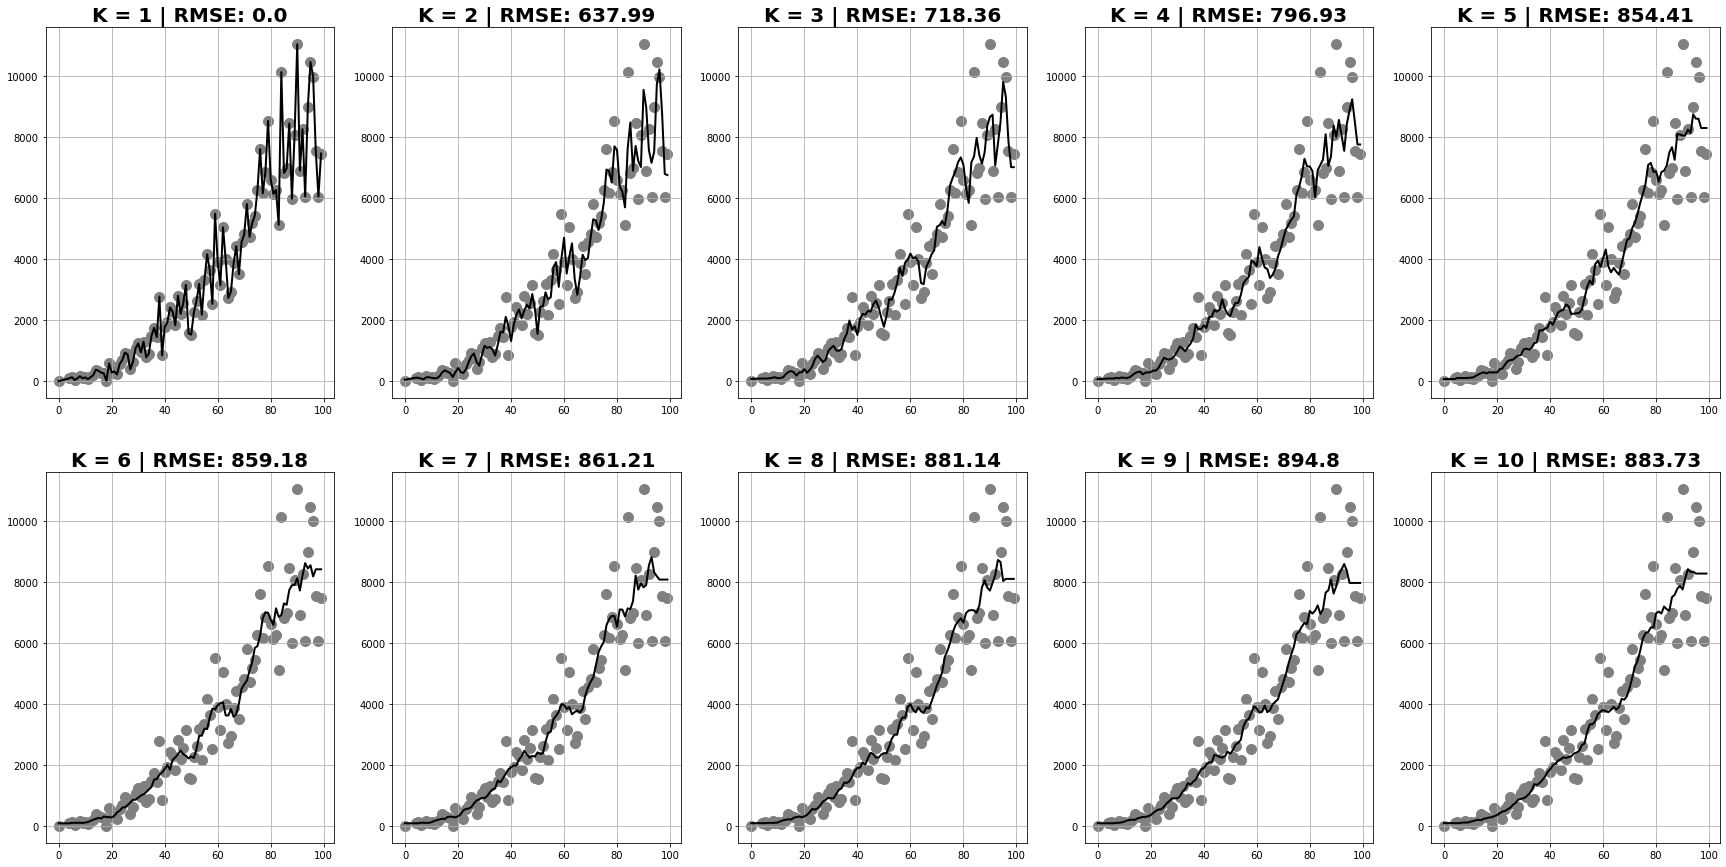

In [30]:
X = dtc[['taxa_crim']].values
y = dtc.crimes.values

plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(dtc['taxa_crim'], dtc['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

In [31]:
dtc_teste = ds_teste.groupby(['taxa_crim'], as_index=False).crimes.sum()

for i in range(len(dtc_teste.taxa_crim)):
    dtc_teste.taxa_crim[i] = int(dtc_teste.taxa_crim[i])

dtc_teste = dtc_teste.groupby(['taxa_crim'], as_index=False).crimes.sum()

<ipython-input-31-1a96b70195b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtc_teste.taxa_crim[i] = int(dtc_teste.taxa_crim[i])


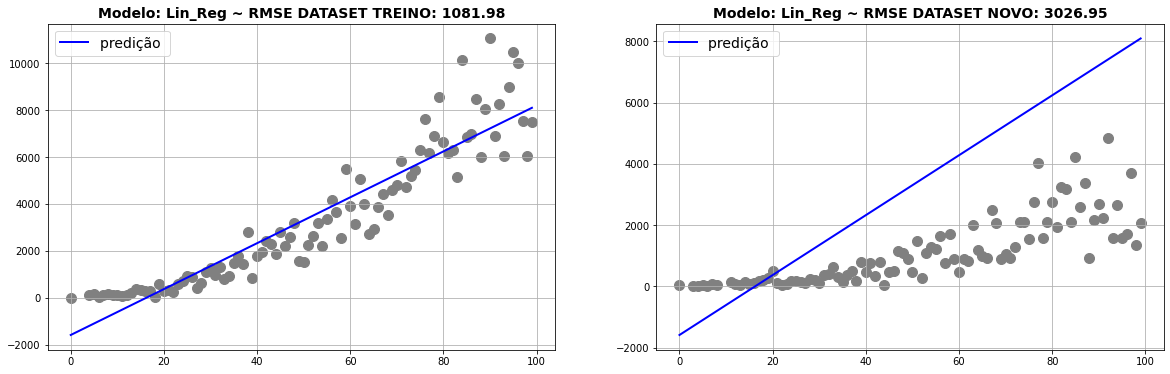

In [32]:
X = dtc['taxa_crim'].values.reshape(-1,1)
y = dtc['crimes'].values
Xnovo = dtc_teste['taxa_crim'].values.reshape(-1,1)
ynovo = dtc_teste['crimes'].values

modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

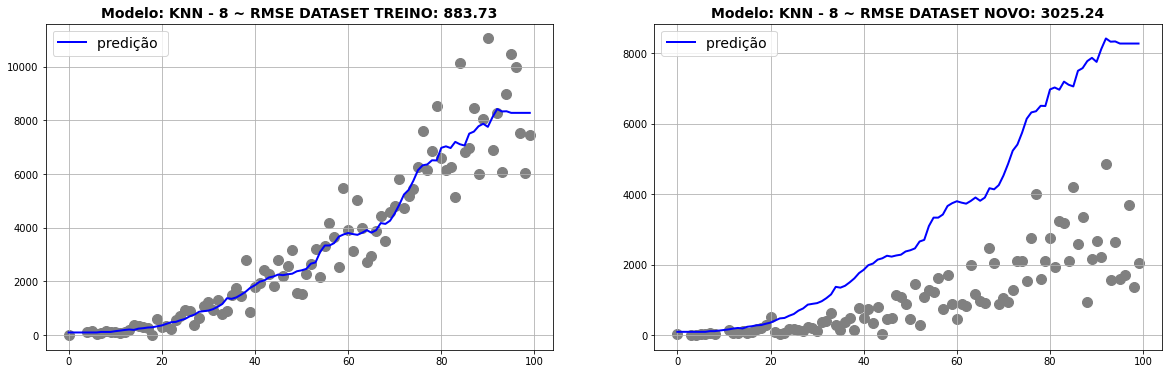

In [34]:
modelo = KNeighborsRegressor(n_neighbors = 10)
nome_modelo = 'KNN - 8'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

Parte 2:
1: Escolhida a variável percentual de policiais por ter uma boa correlação com a variável quantidade de crimes 
O modelo de regressão linear simples está sofrendo de underfiting, enquanto o modelo KNN está sofrendo de overfiting.


